In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

#Fastai library
from fastai.vision import *
from fastai.metrics import error_rate


In [0]:
bs = 64

In [0]:
np.random.seed(2)

In [4]:
#DATA EXTRACTION
path = untar_data(URLs.PETS)

In [5]:
path #The path where data is downloaded.


PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [6]:
path.ls() #List of items contained within the path, two subdirectories in this case.

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [0]:
#Put the PATH of each of the subdirectories into some instance
path_anno = path/'annotations'
path_img = path/'images'

In [0]:
fnames = get_image_files(path_img)

In [0]:
names = get_image_files(path_img)

In [13]:
fnames[1] #An instance from the list fnames, which contains the path of an image

PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Sphynx_179.jpg')

In [0]:
pat = r'/([^/]+)_\d+.jpg$'

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

In [0]:
#DATA VISUALIZATION
img = data.train_ds[1]

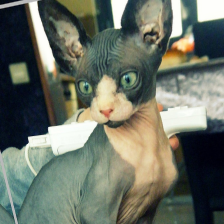

In [17]:
data.train_ds[1][0]

In [18]:
print (len(data.train_ds)) #Total Training Images
print (len(data.valid_ds)) #Total Validation Images

5912
1478


In [19]:
data.c #Total number of classes in our dataset

37

In [20]:
data.classes #Classes labels

['Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British_Shorthair',
 'Egyptian_Mau',
 'Maine_Coon',
 'Persian',
 'Ragdoll',
 'Russian_Blue',
 'Siamese',
 'Sphynx',
 'american_bulldog',
 'american_pit_bull_terrier',
 'basset_hound',
 'beagle',
 'boxer',
 'chihuahua',
 'english_cocker_spaniel',
 'english_setter',
 'german_shorthaired',
 'great_pyrenees',
 'havanese',
 'japanese_chin',
 'keeshond',
 'leonberger',
 'miniature_pinscher',
 'newfoundland',
 'pomeranian',
 'pug',
 'saint_bernard',
 'samoyed',
 'scottish_terrier',
 'shiba_inu',
 'staffordshire_bull_terrier',
 'wheaten_terrier',
 'yorkshire_terrier']

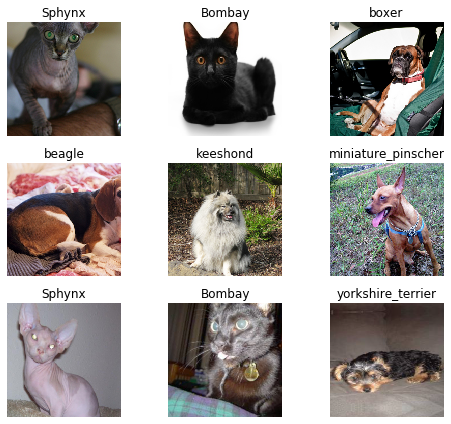

In [21]:
data.show_batch(rows=3, figsize=(7,6))

In [22]:
#MODEL TRAINING
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:04<00:00, 19.6MB/s]


In [23]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.406558,0.314911,0.102842,01:23
1,0.607524,0.267452,0.087957,01:21
2,0.398050,0.222413,0.076455,01:21
3,0.288579,0.208494,0.070365,01:20


In [0]:
learn.save('stage-1')


In [25]:
#RESULT INTERPRETATION
interp = ClassificationInterpretation.from_learner(learn)

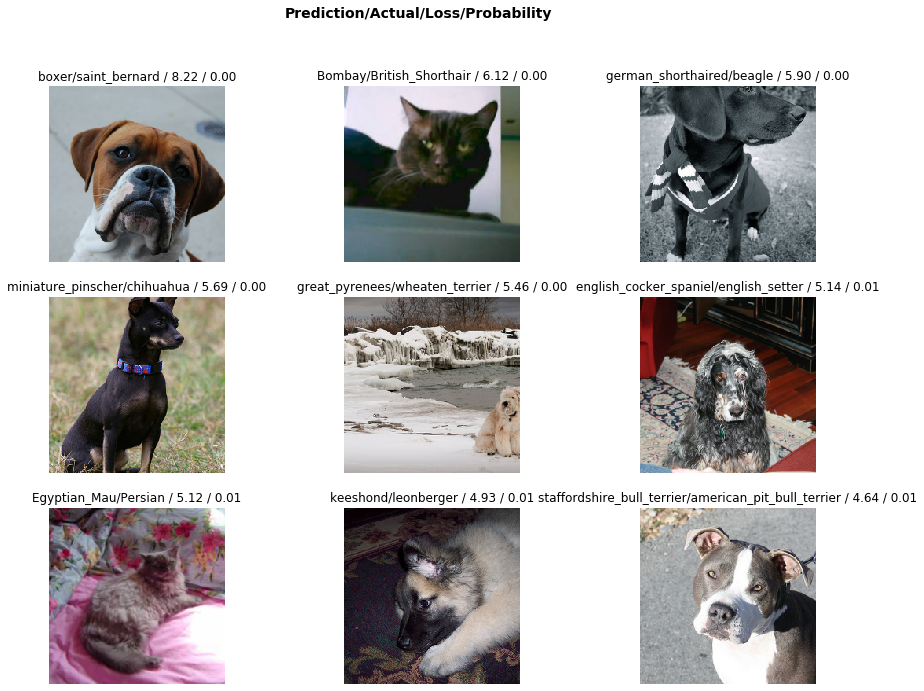

In [26]:
interp.plot_top_losses(9, figsize=(15,11), heatmap=False)

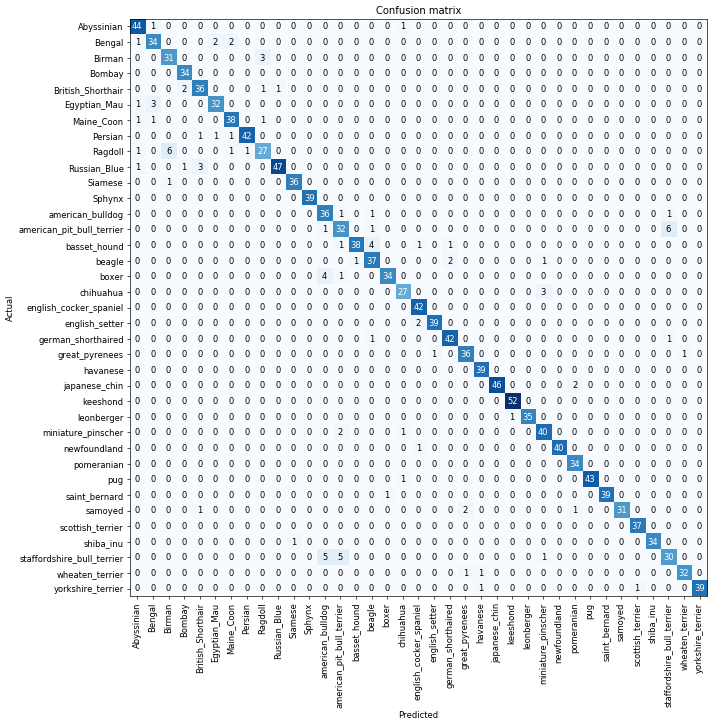

In [27]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [28]:
interp.most_confused(min_val=2)

[('Ragdoll', 'Birman', 6),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('staffordshire_bull_terrier', 'american_bulldog', 5),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5),
 ('basset_hound', 'beagle', 4),
 ('boxer', 'american_bulldog', 4),
 ('Birman', 'Ragdoll', 3),
 ('Egyptian_Mau', 'Bengal', 3),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('chihuahua', 'miniature_pinscher', 3),
 ('Bengal', 'Egyptian_Mau', 2),
 ('Bengal', 'Maine_Coon', 2),
 ('British_Shorthair', 'Bombay', 2),
 ('beagle', 'german_shorthaired', 2),
 ('english_setter', 'english_cocker_spaniel', 2),
 ('japanese_chin', 'pomeranian', 2),
 ('miniature_pinscher', 'american_pit_bull_terrier', 2),
 ('samoyed', 'great_pyrenees', 2)]

In [29]:
#FREEZING AND UNFREEZING
learn.unfreeze()
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.773024,1.064172,0.280785,01:23
1,0.475878,0.298638,0.092693,01:22


In [0]:
learn.load('stage-1');

In [32]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


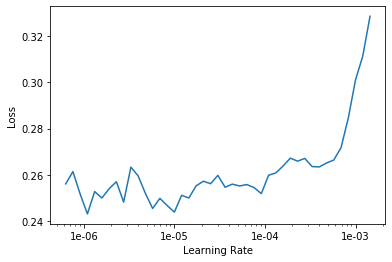

In [33]:
learn.recorder.plot()

In [34]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.255674,0.204879,0.069689,01:22
1,0.230076,0.199050,0.064276,01:22
